In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls

In [2]:
def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    return data

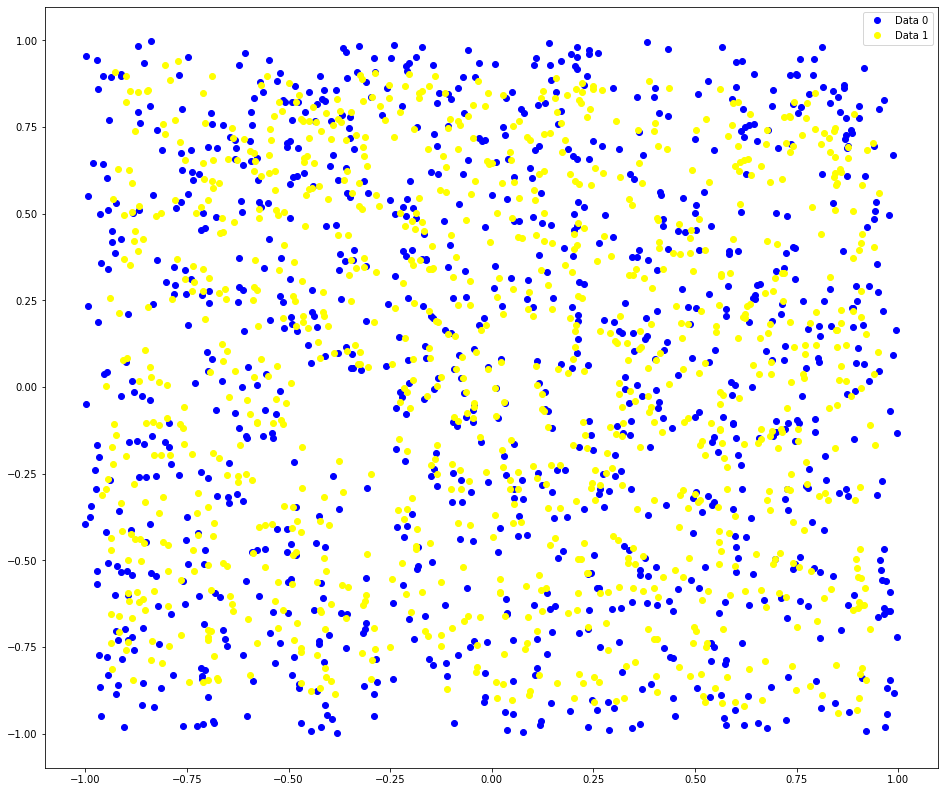

In [3]:
x0 = Read_file("linear_vectorfield_data_x0")
x1 = Read_file("linear_vectorfield_data_x1")

plt.figure(figsize=(16,14))
plt.plot(x0[:,0], x0[:,1], 'o', label="Data 0", color="blue")
plt.plot(x1[:,0], x1[:,1], 'o', label="Data 1", color="yellow")
plt.legend()
plt.show()

In [4]:
v = x1 - x0

coef = np.linalg.lstsq(v, x0, rcond=-1)
print(coef)

(array([[-16.50417081,   7.99583397],
       [ -3.99791569,  -8.50833552]]), array([5.45887991e-12, 9.71518549e-12]), 2, array([1.9707016 , 0.99748763]))


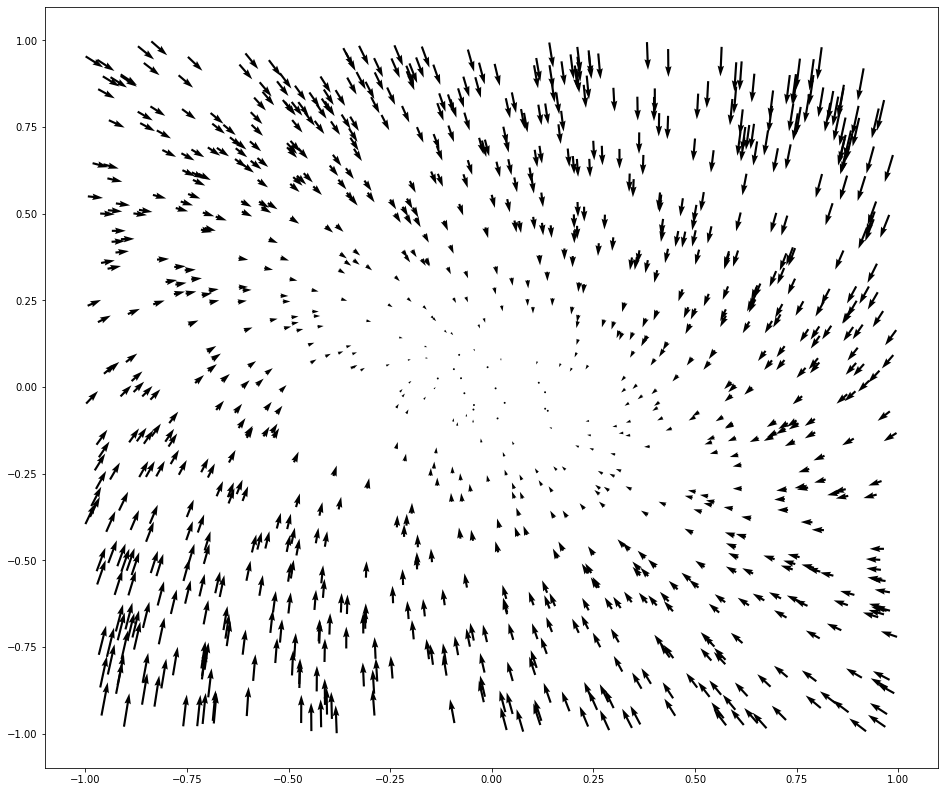

In [5]:
v = x1 - x0
dx = v[:,0]
dy = v[:,1]

plt.figure(figsize=(16,14))
plt.quiver(x0[:,0], x0[:,1], dx, dy)
plt.show()

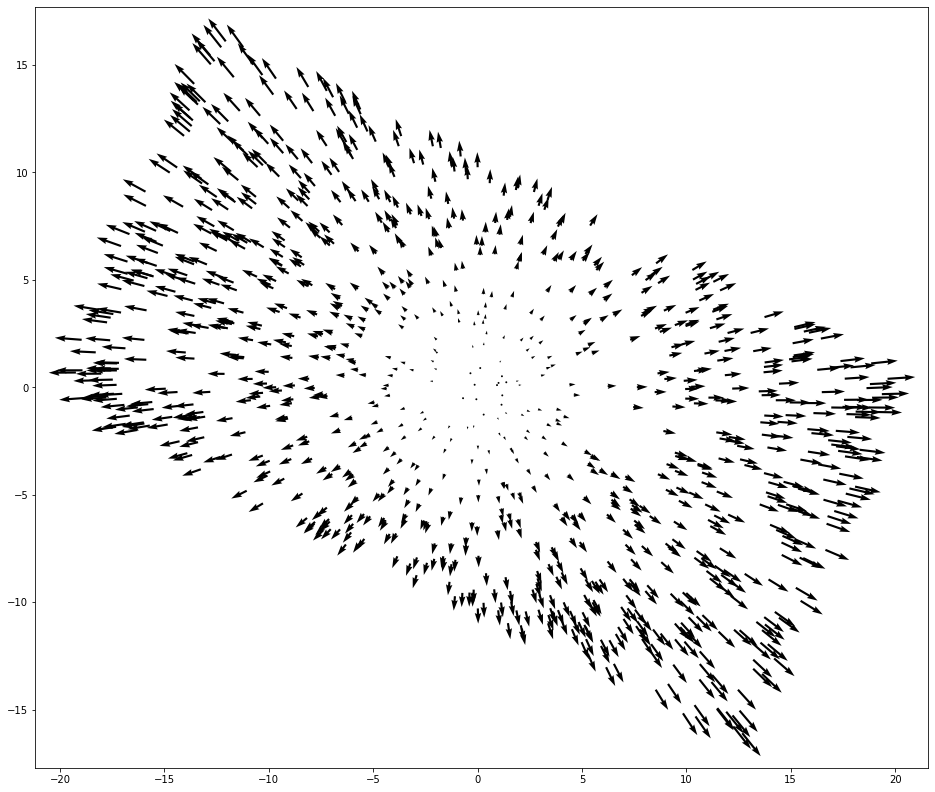

In [6]:
x_hat = x0.dot(coef[0]) #should be A.x not x.A
v = (x_hat - x0)*0.1
dx = v[:,0]
dy = v[:,1]

plt.figure(figsize=(16,14))
plt.quiver(x_hat[:,0], x_hat[:,1], dx, dy)
plt.show()